<a href="https://colab.research.google.com/github/sipocz/I4_0/blob/main/I4_0_MLP_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split



In [27]:
!rm grafikon.py.*
!wget "https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py"

from grafikon import grafikon

rm: cannot remove 'grafikon.py.*': No such file or directory
--2024-05-20 07:18:18--  https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5254 (5.1K) [text/plain]
Saving to: ‘grafikon.py’

grafikon.py         100%[===================>]   5.13K  --.-KB/s    in 0s      

2024-05-20 07:18:18 (53.1 MB/s) - ‘grafikon.py’ saved [5254/5254]



In [5]:
drive.mount('/content/drive', readonly=True,force_remount=True )

Mounted at /content/drive


In [6]:
user = "SL"

In [7]:

if user=="NKF":
    path = "/content/drive/MyDrive/*"
else:
    path = "/content/drive/MyDrive/adatok_szakdoga/adatok_20210201_20240101/df_osszes.csv"

In [8]:
df_osszes=pd.read_csv(path,)

In [9]:
df_osszes["Timestamp"]=pd.to_datetime(df_osszes["Timestamp"], format="%Y-%m-%d %H:%M:%S")

In [10]:
df_osszes.set_index("Timestamp",inplace=True)

In [11]:
del(df_osszes["Unnamed: 0"] )

In [12]:
df_osszes["Szum_metanol"]=df_osszes["Meleg_tartaly_szint"]+df_osszes["Hideg_tartaly_szint"]

In [13]:
#df_osszes=df_osszes.astype(int)

In [14]:
df_mini = df_osszes.filter(['Szum_metanol','Szteroid2_uni_rhv_hom','Szteroid2_2_rhv_hom','Szteroid2_krom_rhv_hom','Szteroid_sp_rhv_hom','Szteroid_nor12_rhv_hom','Szteroid_thf1_rhv_hom','Szteroid_thf2_rhv_hom','Szteroid_merk_rhv_hom','Szintetikus3_1_rhv_hom','Szintetikus3_2_rhv_hom','Szintetikus3_3_rhv_hom','Szintetikus3_4_rhv_hom','Szintetikus3_hidr_rhv_hom','Szintetikus1_1_rhv_hom','Szintetikus1_2_rhv_hom','Szintetikus1_3_rhv_hom','Szintetikus1_4_rhv_hom','Szintetikus1_5_rhv_hom','Szintetikus1_6_rhv_hom','Oldoszer_rhv_elore_hom','Szintetikus3_rhv_elore_hom''Szter_Szter2_Tfl_rhv_elore_hom','Szintetikus1_elore_hom'], axis=1)

In [15]:
df_mini.describe()

,Szum_metanol,Szteroid2_uni_rhv_hom,Szteroid2_2_rhv_hom,Szteroid2_krom_rhv_hom,Szteroid_sp_rhv_hom,Szteroid_nor12_rhv_hom,Szteroid_thf1_rhv_hom,Szteroid_thf2_rhv_hom,Szteroid_merk_rhv_hom,Szintetikus3_1_rhv_hom,...,Szintetikus3_3_rhv_hom,Szintetikus3_4_rhv_hom,Szintetikus3_hidr_rhv_hom,Szintetikus1_1_rhv_hom,Szintetikus1_2_rhv_hom,Szintetikus1_3_rhv_hom,Szintetikus1_4_rhv_hom,Szintetikus1_5_rhv_hom,Szintetikus1_6_rhv_hom,Oldoszer_rhv_elore_hom
count,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,...,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06
mean,1.037296e+02,1.791602e+01,1.866796e+01,1.842537e+01,1.779770e+01,1.735590e+01,2.066038e+01,1.786041e+01,1.774129e+01,1.906506e+01,...,1.772424e+01,1.855604e+01,2.046158e+01,2.103953e+01,1.996895e+01,2.076945e+01,2.163324e+01,2.079118e+01,1.990206e+01,1.956564e+01
std,1.210746e+01,3.938346e+00,3.974075e+00,4.476605e+00,3.776185e+00,3.746389e+00,4.717789e+00,4.145986e+00,3.863727e+00,3.571611e+00,...,3.894463e+00,4.098838e+00,6.005507e+00,4.374065e+00,3.781432e+00,4.050601e+00,4.918608e+00,3.974792e+00,4.257373e+00,4.580713e+00
min,0.000000e+00,0.000000e+00,-5.000000e+01,-2.508000e+01,-2.504000e+01,-2.501000e+01,-1.900024e-01,-1.700020e-01,-5.000000e+01,0.000000e+00,...,-2.511500e+01,-2.512500e+01,-5.000000e+01,-5.000000e+01,-5.000000e+01,-4.282000e+01,-5.000000e+01,-5.000000e+01,-4.500198e-02,0.000000e+00
25%,9.548014e+01,1.514000e+01,1.587500e+01,1.525000e+01,1.509000e+01,1.463499e+01,1.781000e+01,1.492001e+01,1.492499e+01,1.675000e+01,...,1.497500e+01,1.569500e+01,1.662500e+01,1.844247e+01,1.760008e+01,1.815500e+01,1.879000e+01,1.880000e+01,1.747500e+01,1.707154e+01
50%,1.030017e+02,1.855500e+01,1.905500e+01,1.887500e+01,1.857500e+01,1.813500e+01,2.014500e+01,1.847500e+01,1.834000e+01,1.944000e+01,...,1.828000e+01,1.898000e+01,1.985000e+01,2.146022e+01,2.060105e+01,2.040000e+01,2.155500e+01,2.110001e+01,2.088000e+01,2.070333e+01
75%,1.111282e+02,2.078500e+01,2.104500e+01,2.073000e+01,2.055000e+01,2.024500e+01,2.306500e+01,2.040000e+01,2.040000e+01,2.118500e+01,...,2.026500e+01,2.077000e+01,2.321250e+01,2.363088e+01,2.258063e+01,2.335000e+01,2.423500e+01,2.311250e+01,2.275000e+01,2.259892e+01
max,1.526011e+02,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,4.989000e+01,5.995000e+01,...,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,3.870854e+01


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

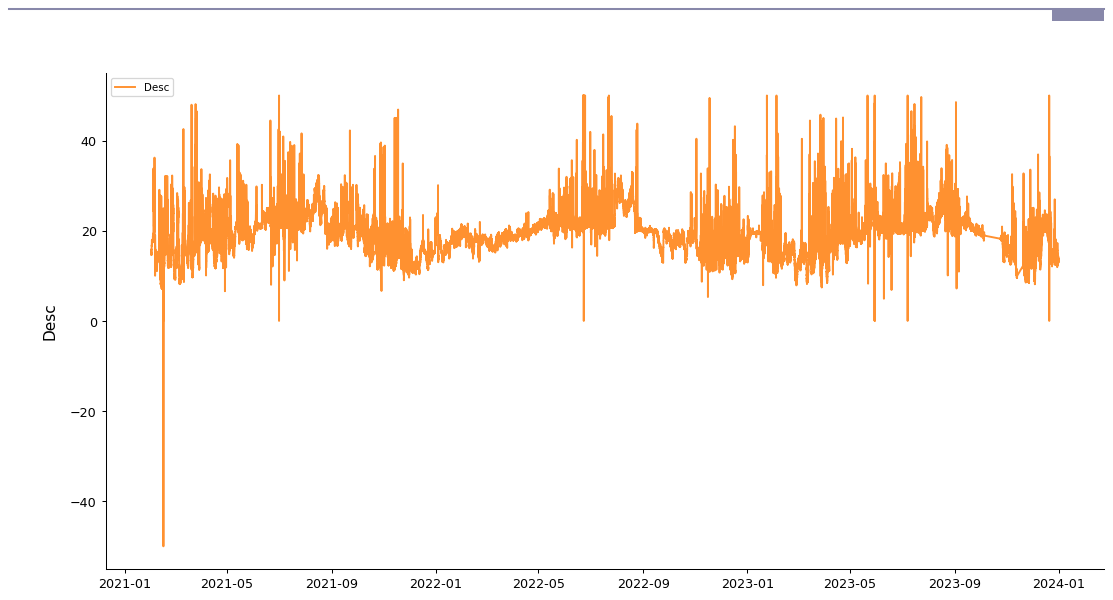

In [16]:
grafikon(df_mini,"Szteroid2_2_rhv_hom","Desc")

In [17]:
df_mini=df_mini[df_mini.Szteroid2_2_rhv_hom>-45.0]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

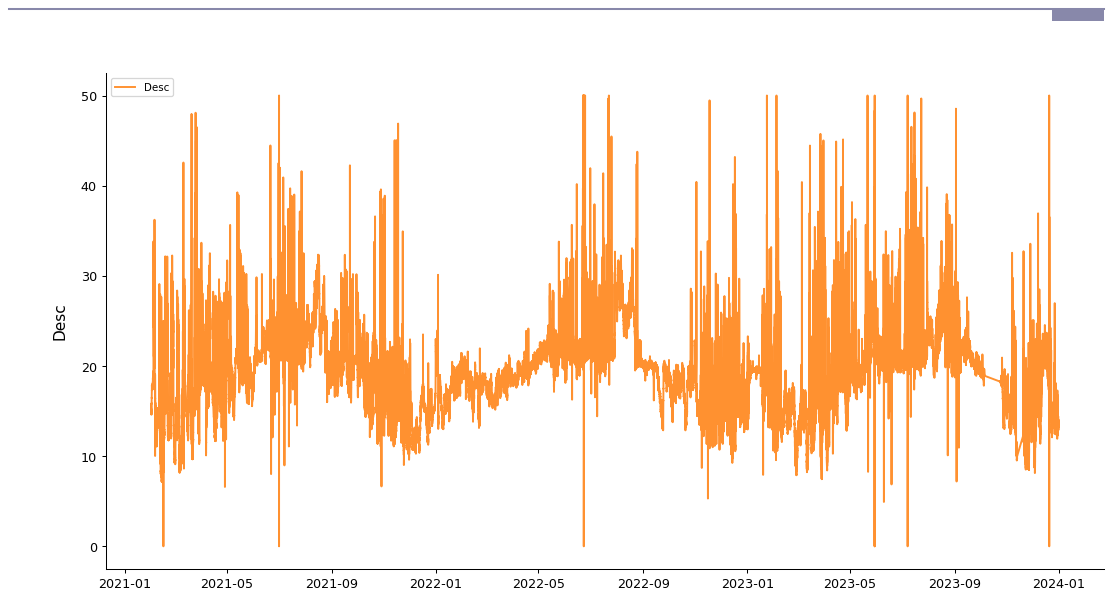

In [18]:
grafikon(df_mini,"Szteroid2_2_rhv_hom","Desc")

In [19]:
y=df_mini.Szum_metanol
X=df_mini.filter(['Szteroid2_uni_rhv_hom','Szteroid2_2_rhv_hom','Szteroid2_krom_rhv_hom','Szteroid_sp_rhv_hom','Szteroid_nor12_rhv_hom','Szteroid_thf1_rhv_hom','Szteroid_thf2_rhv_hom','Szteroid_merk_rhv_hom','Szintetikus3_1_rhv_hom','Szintetikus3_2_rhv_hom','Szintetikus3_3_rhv_hom','Szintetikus3_4_rhv_hom','Szintetikus3_hidr_rhv_hom','Szintetikus1_1_rhv_hom','Szintetikus1_2_rhv_hom','Szintetikus1_3_rhv_hom','Szintetikus1_4_rhv_hom','Szintetikus1_5_rhv_hom','Szintetikus1_6_rhv_hom','Oldoszer_rhv_elore_hom','Szintetikus3_rhv_elore_hom''Szter_Szter2_Tfl_rhv_elore_hom','Szintetikus1_elore_hom'])

#MLPRegressor

In [20]:
from sklearn.neural_network import MLPRegressor

In [41]:
mlpr=MLPRegressor(verbose=True,max_iter=50)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X[:], y[:],test_size=.3,random_state =123,shuffle=False)

In [43]:
mlpr.fit(X_train,y_train)

Iteration 1, loss = 91.98683333
Iteration 2, loss = 40.28590724
Iteration 3, loss = 36.27328711
Iteration 4, loss = 33.91738767
Iteration 5, loss = 32.56611987
Iteration 6, loss = 31.68544920
Iteration 7, loss = 30.93796181
Iteration 8, loss = 30.20414553
Iteration 9, loss = 29.59765212
Iteration 10, loss = 29.01059203
Iteration 11, loss = 28.53177577
Iteration 12, loss = 28.10841389
Iteration 13, loss = 27.63803956
Iteration 14, loss = 27.17485504
Iteration 15, loss = 26.79941681
Iteration 16, loss = 26.48438829
Iteration 17, loss = 26.26547813
Iteration 18, loss = 25.95395555
Iteration 19, loss = 25.81220432
Iteration 20, loss = 25.53657367
Iteration 21, loss = 25.41315050
Iteration 22, loss = 25.18860697
Iteration 23, loss = 25.04544422
Iteration 24, loss = 24.86894578
Iteration 25, loss = 24.75290919
Iteration 26, loss = 24.54378066
Iteration 27, loss = 24.49874841
Iteration 28, loss = 24.28030919
Iteration 29, loss = 24.20480242
Iteration 30, loss = 24.11070638
Iteration 31, loss 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=50, verbose=True)

In [44]:
y_pred=mlpr.predict(X_test)

In [45]:
mlpr.score(X_test,y_test)

-0.9646171384970792

In [46]:
A_class_df=pd.DataFrame({"real":y_test,"predicted":y_pred})

In [47]:
A_class_df.sort_index(inplace=True)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

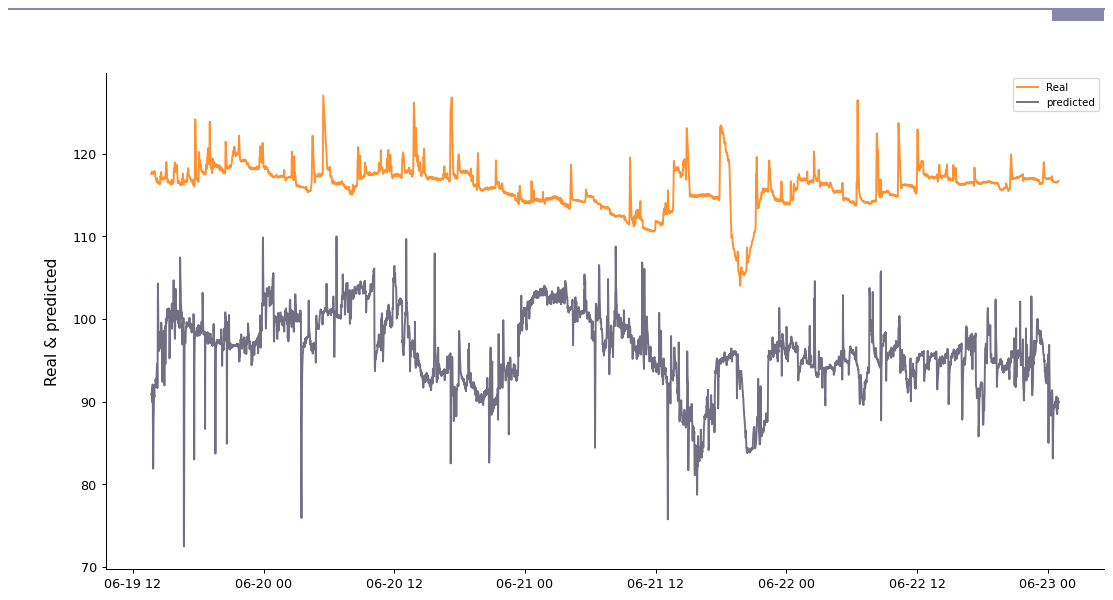

In [48]:
grafikon(A_class_df[25000:30000],"real","Real","predicted","predicted",n_graf=2)